In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = 'F:/Project/University_Project/Dataset/Crop+Weather/Burdwan_Crop.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Temparetue,Rainfall,Humidity,Sun hours
0,West Bengal,BARDHAMAN,2009,Autumn,Rice,17119,52128.0,22.1,341,81.0,8.1
1,West Bengal,BARDHAMAN,2009,Kharif,Dry ginger,128,226.0,26.9,1189,80.0,8.2
2,West Bengal,BARDHAMAN,2009,Kharif,Jute,12459,222721.0,26.9,1189,80.0,8.2
3,West Bengal,BARDHAMAN,2009,Kharif,Maize,147,254.0,26.9,1189,80.0,8.2
4,West Bengal,BARDHAMAN,2009,Kharif,Mesta,88,46.0,26.9,1189,80.0,8.2


In [4]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Temparetue,Rainfall,Humidity,Sun hours
349,West Bengal,BARDHAMAN,2019,Summer,Moong(Green Gram),69,82.0,36.40,243,59.0,10.10
350,West Bengal,BARDHAMAN,2019,Summer,Rice,150267,490532.0,36.40,243,59.0,10.10
351,West Bengal,BARDHAMAN,2019,Summer,Sesamum,17132,15571.0,36.40,243,59.0,10.10
352,West Bengal,BARDHAMAN,2019,Annual,Sugarcane,1440,113754.0,26.89,1601,79.1,8.90
353,West Bengal,BARDHAMAN,2019,Winter,Rice,419814,1361138.0,17.20,43,61.1,9.23


In [5]:
df.size

3894

In [6]:
df.shape

(354, 11)

In [7]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Temparetue', 'Rainfall', 'Humidity', 'Sun hours'],
      dtype='object')

In [8]:
df['Crop'].unique()

array(['Rice', 'Dry ginger', 'Jute', 'Maize', 'Mesta', 'Soyabean',
       'Sunflower', 'Urad', 'Gram', 'Horse-gram', 'Khesari', 'Linseed',
       'Masoor', 'Peas & beans (Pulses)', 'Rapeseed &Mustard',
       'Safflower', 'Wheat', 'Moong(Green Gram)', 'Coconut ',
       'Dry chillies', 'Groundnut', 'Potato', 'Sannhamp', 'Sesamum',
       'Sugarcane', 'Turmeric', 'Cotton(lint)', 'Arhar/Tur', 'Arecanut',
       'Other Kharif pulses', 'Garlic', 'Barley', 'Other  Rabi pulses'],
      dtype=object)

In [9]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area               int64
Production       float64
Temparetue       float64
Rainfall           int64
Humidity         float64
Sun hours        float64
dtype: object

In [10]:
df['Crop'].value_counts()

Rice                     33
Moong(Green Gram)        28
Groundnut                27
Maize                    19
Urad                     15
Sesamum                  13
Potato                   11
Jute                     11
Gram                     11
Khesari                  11
Rapeseed &Mustard        11
Sugarcane                11
Peas & beans (Pulses)    11
Sannhamp                 11
Masoor                   11
Wheat                    11
Soyabean                 11
Sunflower                11
Linseed                  10
Safflower                10
Mesta                    10
Horse-gram                9
Arhar/Tur                 8
Other Kharif pulses       7
Coconut                   5
Dry chillies              5
Dry ginger                5
Turmeric                  5
Cotton(lint)              5
Arecanut                  4
Barley                    2
Garlic                    1
Other  Rabi pulses        1
Name: Crop, dtype: int64

<AxesSubplot:>

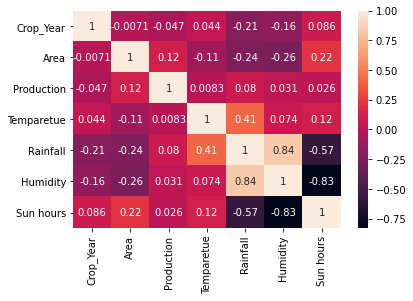

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
features = df[['Crop_Year','Area','Temparetue','Rainfall','Humidity','Sun hours']]
target = df['Crop']
labels = df['Crop']

In [13]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [16]:
Xtrain

,Crop_Year,Area,Temparetue,Rainfall,Humidity,Sun hours
305,2018,124,21.40,186,64.00,8.90
262,2017,3,30.10,1267,79.50,8.45
99,2012,50,28.10,1194,81.00,8.34
291,2018,9356,23.41,316,80.23,8.16
341,2019,391,21.60,156,63.00,9.20
...,...,...,...,...,...,...
299,2018,48,27.96,1099,79.80,8.32
22,2009,1810,25.71,1474,78.38,8.90
72,2011,91,28.50,1173,81.69,8.40
15,2009,20,20.30,171,66.00,9.00


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  40.845070422535215
                       precision    recall  f1-score   support

             Arecanut       0.00      0.00      0.00         1
            Arhar/Tur       0.00      0.00      0.00         1
             Coconut        0.00      0.00      0.00         3
         Cotton(lint)       0.00      0.00      0.00         2
         Dry chillies       0.00      0.00      0.00         0
           Dry ginger       0.00      0.00      0.00         1
                 Gram       0.00      0.00      0.00         0
            Groundnut       0.50      0.17      0.25         6
                 Jute       1.00      1.00      1.00         1
              Khesari       0.00      0.00      0.00         3
              Linseed       0.00      0.00      0.00         0
                Maize       0.75      0.50      0.60         6
               Masoor       0.43      0.60      0.50         5
                Mesta       0.00      0.00      0.00         2
    M

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=10)

In [19]:
score

array([0.30555556, 0.47222222, 0.52777778, 0.52777778, 0.54285714,
       0.51428571, 0.48571429, 0.45714286, 0.48571429, 0.34285714])

In [20]:
print(np.mean(score))

0.46619047619047616


In [21]:
print("Training Accuracy is:", DecisionTree.score(Xtrain,Ytrain))

Training Accuracy is: 0.6113074204946997


In [22]:
print("Training Accuracy is:", DecisionTree.score(Xtest,Ytest))

Training Accuracy is: 0.4084507042253521


# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.39436619718309857
                       precision    recall  f1-score   support

             Arecanut       0.00      0.00      0.00         1
            Arhar/Tur       0.50      1.00      0.67         1
               Barley       0.00      0.00      0.00         0
             Coconut        1.00      0.33      0.50         3
         Cotton(lint)       0.00      0.00      0.00         2
         Dry chillies       0.00      0.00      0.00         0
           Dry ginger       0.33      1.00      0.50         1
                 Gram       0.00      0.00      0.00         0
            Groundnut       0.00      0.00      0.00         6
                 Jute       1.00      1.00      1.00         1
              Khesari       1.00      0.33      0.50         3
                Maize       1.00      0.33      0.50         6
               Masoor       1.00      0.20      0.33         5
                Mesta       0.00      0.00      0.00         2
    Mo

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.35211268, 0.50704225, 0.45070423, 0.52112676, 0.4       ])

# Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.07042253521126761
                       precision    recall  f1-score   support

             Arecanut       0.00      0.00      0.00         1
            Arhar/Tur       0.00      0.00      0.00         1
             Coconut        0.00      0.00      0.00         3
         Cotton(lint)       0.00      0.00      0.00         2
           Dry ginger       0.00      0.00      0.00         1
            Groundnut       0.00      0.00      0.00         6
                 Jute       0.00      0.00      0.00         1
              Khesari       0.00      0.00      0.00         3
              Linseed       0.00      0.00      0.00         0
                Maize       0.00      0.00      0.00         6
               Masoor       0.00      0.00      0.00         5
                Mesta       0.00      0.00      0.00         2
    Moong(Green Gram)       0.00      0.00      0.00         8
  Other Kharif pulses       0.00      0.00      0.00         2
Peas & beans (

In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.09859155, 0.09859155, 0.09859155, 0.08450704, 0.08571429])

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.29577464788732394
                       precision    recall  f1-score   support

             Arecanut       0.00      0.00      0.00         1
            Arhar/Tur       0.00      0.00      0.00         1
             Coconut        0.00      0.00      0.00         3
         Cotton(lint)       0.00      0.00      0.00         2
         Dry chillies       0.00      0.00      0.00         0
           Dry ginger       0.00      0.00      0.00         1
            Groundnut       0.23      0.50      0.32         6
                 Jute       0.50      1.00      0.67         1
              Khesari       0.00      0.00      0.00         3
                Maize       0.00      0.00      0.00         6
               Masoor       0.00      0.00      0.00         5
                Mesta       0.00      0.00      0.00         2
    Moong(Green Gram)       0.40      0.50      0.44         8
  Other Kharif pulses       0.00      0.00      0.00         

In [27]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.32394366, 0.32394366, 0.32394366, 0.38028169, 0.32857143])

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


RF's Accuracy is:  0.2676056338028169
                       precision    recall  f1-score   support

             Arecanut       0.00      0.00      0.00         1
            Arhar/Tur       0.00      0.00      0.00         1
               Barley       0.00      0.00      0.00         0
             Coconut        0.00      0.00      0.00         3
         Cotton(lint)       0.00      0.00      0.00         2
         Dry chillies       0.00      0.00      0.00         0
           Dry ginger       0.00      0.00      0.00         1
               Garlic       0.00      0.00      0.00         0
                 Gram       0.00      0.00      0.00         0
            Groundnut       0.00      0.00      0.00         6
           Horse-gram       0.00      0.00      0.00         0
                 Jute       1.00      1.00      1.00         1
              Khesari       0.00      0.00      0.00         3
              Linseed       0.00      0.00      0.00         0
                

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.35211268, 0.26760563, 0.4084507 , 0.3943662 , 0.45714286])

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

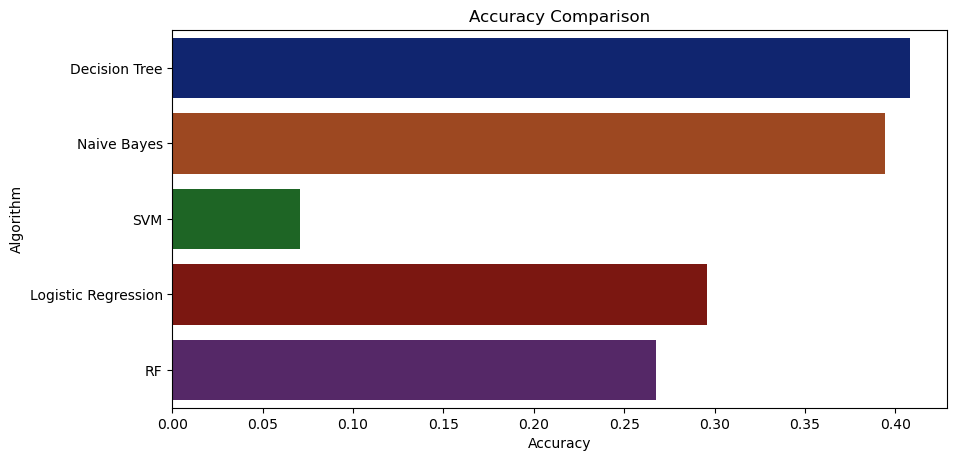

In [32]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [33]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.4084507042253521
Naive Bayes --> 0.39436619718309857
SVM --> 0.07042253521126761
Logistic Regression --> 0.29577464788732394
RF --> 0.2676056338028169


In [43]:
data = np.array([[2022,1777,31,1100,80,9.3]])
prediction = RF.predict(data)
print(prediction)

['Sugarcane']
